Support vector regression (SVR) is a robust machine learning method utilized for forecasting continuous results. The SVR model, unlike typical regression models, employs support vector machines (SVMs) principles to transform input features into high-dimensional spaces to locate the ideal hyperplane that accurately represents the data

Support Vector Regression (SVR) is a machine learning algorithm used to predict numbers, like prices, temperatures, or stock values. It’s like drawing a line (or curve) to follow the data as closely as possible but without trying to match every single point exactly.



# Advantages

- **Works well for both simple and complex patterns.**
- **Ignores unimportant points** (focuses only on support vectors).
- **Can handle both straight-line and non-linear relationships.**


# **Support Vector Regression**

SVR gives us the flexibility to define how much error is acceptable in our model and will find an appropriate line (or hyperplane in higher dimensions) to fit the data.


<img src="https://miro.medium.com/max/1438/1*rs0EfF8RPVpgA-EfgAq85g.jpeg">

The Idea Behind Support Vector Regression
The problem of regression is to find a function that approximates mapping from an input domain to real numbers on the basis of a training sample. So let’s now dive deep and understand how SVR works actually.

Support Vector Regression

Consider these two red lines as the decision boundary and the green line as the hyperplane. Our objective, when we are moving on with SVR, is to basically consider the points that are within the decision boundary line. Our best fit line is the hyperplane that has a maximum number of points.

The first thing that we’ll understand is what is the decision boundary (the danger red line above!). Consider these lines as being at any distance, say ‘a’, from the hyperplane. So, these are the lines that we draw at distance ‘+a’ and ‘-a’ from the hyperplane. This ‘a’ in the text is basically referred to as epsilon.

Assuming that the equation of the hyperplane is as follows:

***Y = wx+b (equation of hyperplane)***

Then the equations of decision boundary become:

***wx+b= +a***

***wx+b= -a***

Thus, any hyperplane that satisfies our SVR should satisfy:

***-a < Y- wx+b < +a***

Our main aim here is to decide a decision boundary at ‘a’ distance from the original hyperplane such that data points closest to the hyperplane or the support vectors are within that boundary line.

Hence, we are going to take only those points that are within the decision boundary and have the least error rate, or are within the Margin of Tolerance. This gives us a better fitting model.







<img src="image-375.png">

## **Getting Started with Support Vector Regression**

In [1]:
#importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## **DataFraming**

Read .csv data into a DataFrame

In [2]:
dataset = pd.read_csv("./Position_Salaries.csv")

dataset.head()

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000


In [6]:
X = dataset.iloc[:,1:2].values.astype(float)
y = dataset.iloc[:,2:3].values.astype(float)

print(X.shape)
print(y.shape)

(10, 1)
(10, 1)


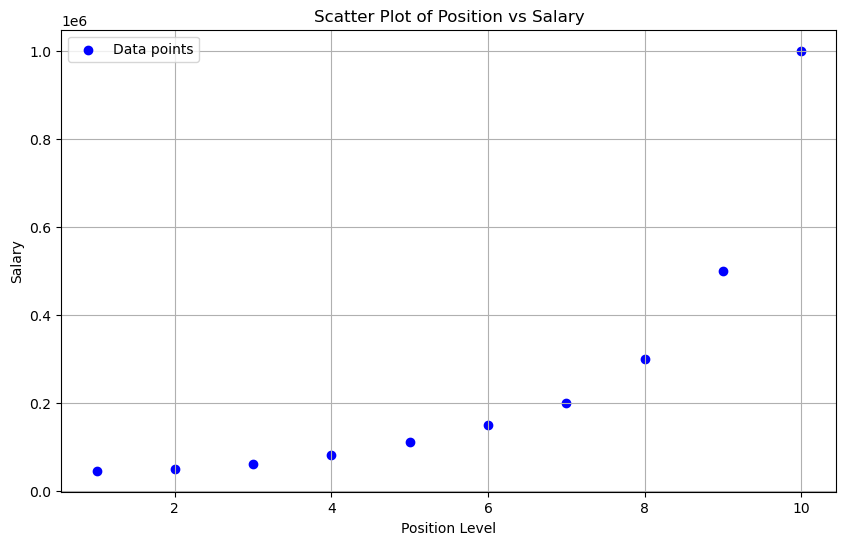

## **Feature Scaling**

Standard Scaler

What StandardScaler does is like converting all these numbers to a common, comparable scale. It's similar to converting different currencies to a single currency so you can compare them easily.


In [14]:
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
y = sc_y.fit_transform(y)

## **Visualizing the Dataset**

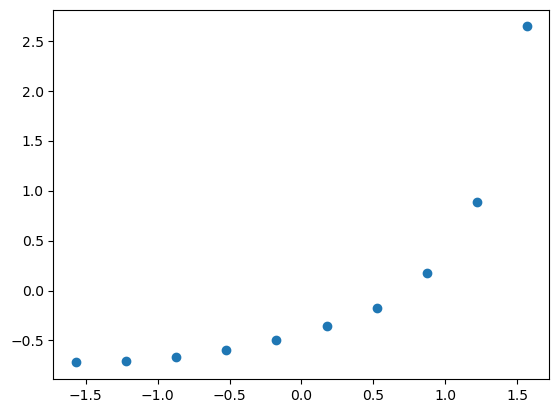

In [15]:
plt.scatter(X, y)
plt.show()

## **Training the Model**
We are using Support Vector regression model as imported from sklearn library and then it's being trained on x and y (any 2 major axis of datasets)

In [16]:
model = SVR(kernel = 'rbf')
model.fit(X,y)

/home/muzammil/anaconda3/lib/python3.12/site-packages/sklearn/utils/validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR()

## **Visualization**

Visualize the dataset with the fit model using matplotlib.

/tmp/ipykernel_16110/2721797239.py:1: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  X_grid = np.arange(min(X), max(X), 0.1)


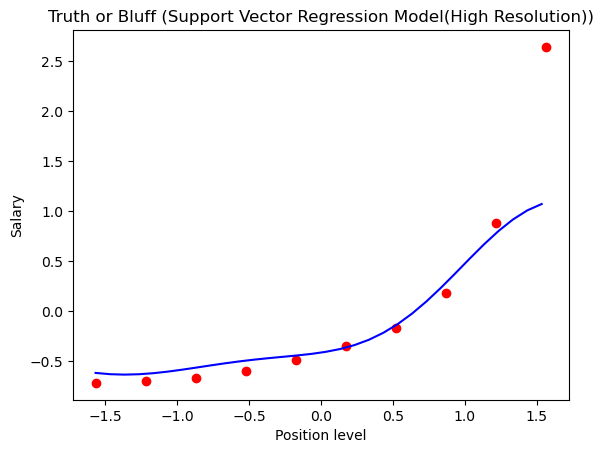

In [17]:
X_grid = np.arange(min(X), max(X), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(X, y, color = "red")
plt.plot(X_grid, model.predict(X_grid), color = "blue")
plt.title("Truth or Bluff (Support Vector Regression Model(High Resolution))")
plt.xlabel("Position level")
plt.ylabel("Salary")
plt.show()

## **Prediction**
We will predict the Brain weight by giving an input of Brain Size

## **Comparing it with Polynomial Regression**

In [19]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree = 3)
X_poly = poly.fit_transform(X)
poly.fit(X_poly, y)

PolynomialFeatures(degree=3)

In [20]:
#Training the Regressor Model with Polynomial features

from sklearn.linear_model import LinearRegression
polymodel = LinearRegression()
polymodel.fit(X_poly,y)

LinearRegression()

Text(0, 0.5, 'Brain Weight')

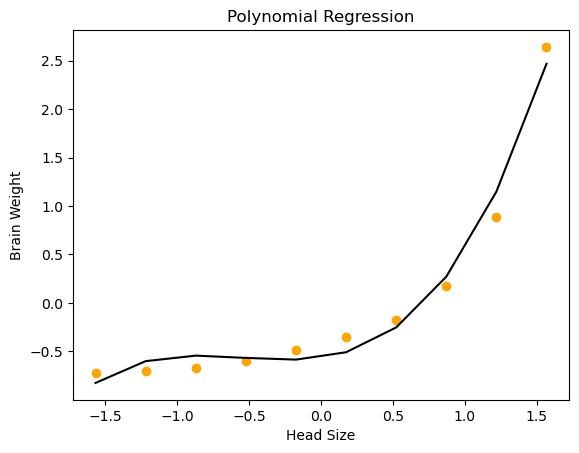

In [21]:
plt.scatter(X,y, color = 'orange')
plt.plot(X,polymodel.predict(poly.fit_transform(X)), color = 'black')
plt.title('Polynomial Regression')
plt.xlabel('Head Size')
plt.ylabel('Brain Weight')